In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("zoominfo_data")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2020-06-04 00:00:00-04:00,40.000000,42.000000,32.099998,34.000000,34.000000,24801800,0.0,0.0
1,2020-06-05 00:00:00-04:00,36.500000,40.000000,34.599998,38.889999,38.889999,9110700,0.0,0.0
2,2020-06-08 00:00:00-04:00,41.900002,47.900002,40.660000,44.689999,44.689999,9020300,0.0,0.0
3,2020-06-09 00:00:00-04:00,46.930000,51.750000,44.700001,50.000000,50.000000,9200600,0.0,0.0
4,2020-06-10 00:00:00-04:00,59.220001,64.400002,50.070000,50.299999,50.299999,18098700,0.0,0.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Convert Date to datetime and remove time zone information
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.tz_convert(None)

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2020-06-04 04:00:00,40.000000,42.000000,32.099998,34.000000,34.000000,24801800,0.0,0.0
1,2020-06-05 04:00:00,36.500000,40.000000,34.599998,38.889999,38.889999,9110700,0.0,0.0
2,2020-06-08 04:00:00,41.900002,47.900002,40.660000,44.689999,44.689999,9020300,0.0,0.0
3,2020-06-09 04:00:00,46.930000,51.750000,44.700001,50.000000,50.000000,9200600,0.0,0.0
4,2020-06-10 04:00:00,59.220001,64.400002,50.070000,50.299999,50.299999,18098700,0.0,0.0


In [7]:
print(type(data['Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
close_prices = data[['Close']].values

In [9]:
close_prices 

array([[34.        ],
       [38.88999939],
       [44.68999863],
       ...,
       [10.65999985],
       [10.39999962],
       [10.51000023]])

In [10]:
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

In [11]:
train_data.shape, test_data.shape

((921, 1), (231, 1))

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [13]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [14]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [15]:
time_step = 60
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

In [16]:
X_train.shape, y_train.shape

((861, 60, 1), (861, 1))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout

In [18]:
def build_model_a(time_step):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))   # Input shape
    model.add(GRU(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [19]:
def build_model_b(time_step):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))
    model.add(GRU(32, return_sequences=True))
    model.add(GRU(32, return_sequences=True))
    model.add(GRU(32))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [20]:
# Train Model A
model_a = build_model_a(time_step)
history_a = model_a.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0873 - val_loss: 0.0063
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0122 - val_loss: 0.0016
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0065 - val_loss: 1.7095e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0057 - val_loss: 1.7871e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0048 - val_loss: 2.2840e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0045 - val_loss: 1.7536e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0051 - val_loss: 1.9000e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0048 - val_loss: 1.4838e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0050 - val_loss: 3.4609e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0048 - val_loss: 1.6554e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0039 - val_loss: 1.6879e-04
Epoch 12/20
25/25 ━━━━━━━━━

In [21]:
history_a.history['loss']  

[0.046289585530757904,
 0.009516596794128418,
 0.006863465998321772,
 0.005064415279775858,
 0.0048648901283741,
 0.004668066278100014,
 0.004986876156181097,
 0.004549402743577957,
 0.0047789691016077995,
 0.004619914572685957,
 0.003835235256701708,
 0.004321138374507427,
 0.003908802289515734,
 0.0038902321830391884,
 0.004175717476755381,
 0.0038041493389755487,
 0.003977710381150246,
 0.004154128488153219,
 0.0035446733236312866,
 0.0036649934481829405]

In [22]:
history_a.history['val_loss']

[0.00628677336499095,
 0.001616339897736907,
 0.0001709495991235599,
 0.00017870767624117434,
 0.00022839805751573294,
 0.00017536248196847737,
 0.00019000322208739817,
 0.0001483805535826832,
 0.0003460897132754326,
 0.00016554477042518556,
 0.00016878799942787737,
 0.00013591014430858195,
 0.00013138311624061316,
 0.00015007544425316155,
 0.0001374642743030563,
 0.00023090202012099326,
 0.0001368445809930563,
 0.00019329313363414258,
 0.00011535372323123738,
 0.00020657647110056132]

In [23]:
model_b = build_model_b(time_step)
history_b = model_b.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.1690 - val_loss: 0.0234
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0178 - val_loss: 0.0095
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077 - val_loss: 7.5943e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0058 - val_loss: 4.1250e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0060 - val_loss: 3.2187e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0046 - val_loss: 3.3007e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0051 - val_loss: 4.1322e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0047 - val_loss: 2.1168e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0046 - val_loss: 1.9691e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0040 - val_loss: 1.9292e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034 - val_loss: 2.2107e-04
Epoch 12/20
25/25 ━━━━━━━━━

In [24]:
history_b.history['loss']  

[0.08551644533872604,
 0.014624641276896,
 0.008225608617067337,
 0.005888740997761488,
 0.005844722501933575,
 0.0046935370191931725,
 0.004788464866578579,
 0.004540354013442993,
 0.004425095859915018,
 0.0038510977756232023,
 0.0038648112677037716,
 0.003781684674322605,
 0.00370742822997272,
 0.0033027229364961386,
 0.004004448652267456,
 0.003677714616060257,
 0.003004807746037841,
 0.003178492421284318,
 0.003495917422696948,
 0.003274595132097602]

In [25]:
history_b.history['val_loss']

[0.02341974712908268,
 0.009502933360636234,
 0.0007594295311719179,
 0.00041249633068218827,
 0.00032187261967919767,
 0.0003300696553196758,
 0.0004132180183660239,
 0.00021168321836739779,
 0.00019690804765559733,
 0.00019291833450552076,
 0.000221066118683666,
 0.0002209628582932055,
 0.00017355679301545024,
 0.00016460403276141733,
 0.00016507110558450222,
 0.00022120296489447355,
 0.00014771365385968238,
 0.00016595765191596001,
 0.00015015280223451555,
 0.00014118685794528574]

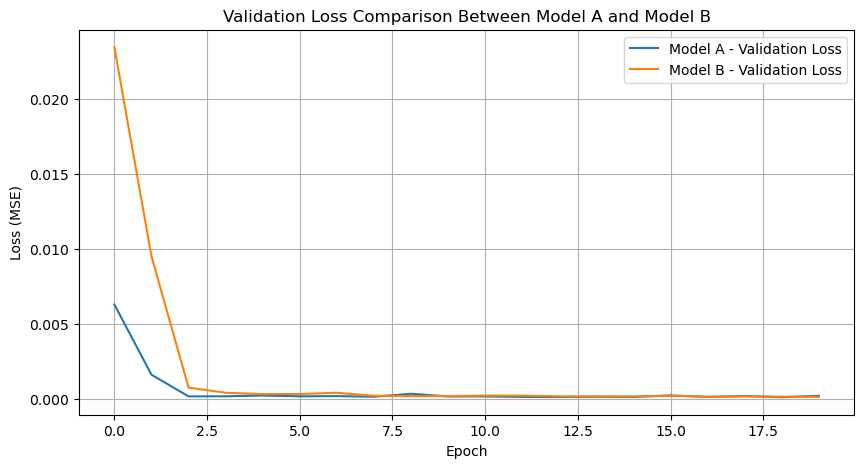

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['val_loss'], label='Model A - Validation Loss')
plt.plot(history_b.history['val_loss'], label='Model B - Validation Loss')
plt.title('Validation Loss Comparison Between Model A and Model B')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
predicted_a_scaled = model_a.predict(X_test)
predicted_b_scaled = model_b.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [31]:
predicted_a_scaled.shape

(171, 1)

In [32]:
predicted_a = scaler.inverse_transform(predicted_a_scaled)
predicted_b = scaler.inverse_transform(predicted_b_scaled)
actual = scaler.inverse_transform(y_test)

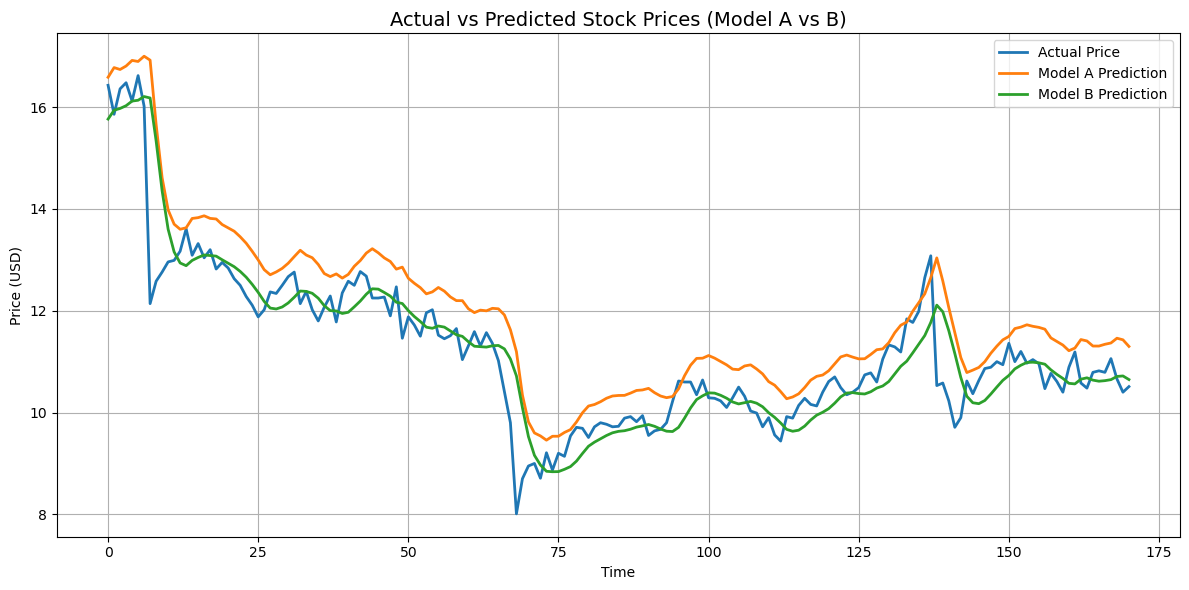

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', linewidth=2)
plt.plot(predicted_a, label='Model A Prediction', linewidth=2)
plt.plot(predicted_b, label='Model B Prediction', linewidth=2)
plt.title('Actual vs Predicted Stock Prices (Model A vs B)', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# RMSE
rmse_a = np.sqrt(mean_squared_error(actual, predicted_a))
rmse_b = np.sqrt(mean_squared_error(actual, predicted_b))

# MAE
mae_a = mean_absolute_error(actual, predicted_a)
mae_b = mean_absolute_error(actual, predicted_b)

# Print results
print(f"Model A – RMSE: {rmse_a:.4f}, MAE: {mae_a:.4f}")
print(f"Model B – RMSE: {rmse_b:.4f}, MAE: {mae_b:.4f}")

Model A – RMSE: 0.9075, MAE: 0.7017
Model B – RMSE: 0.6398, MAE: 0.4101
